<a href="https://colab.research.google.com/github/sarvajithsankar/codechef_project/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully.
Model training complete.
Accuracy: 74.27%
              precision    recall  f1-score   support

       False       0.89      0.75      0.81      1033
        True       0.51      0.74      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.74      0.75      1407



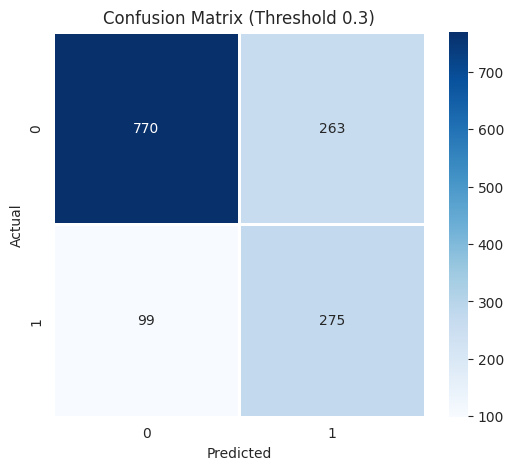

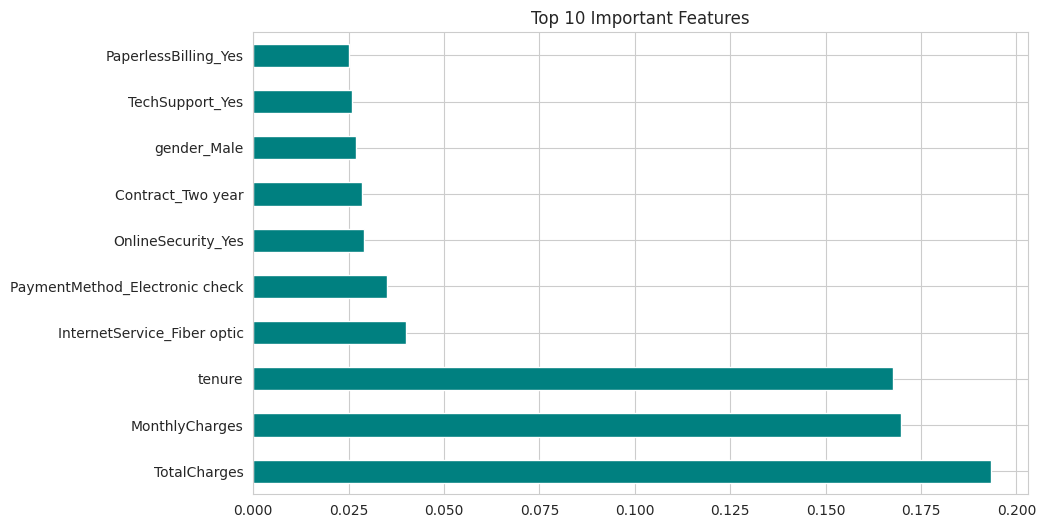

Initializing Simulator...


IntSlider(value=12, description='Tenure (Mo):', max=72)

FloatSlider(value=50.0, description='Bill ($):', max=120.0, min=18.0)

Output()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import ipywidgets as widgets
from IPython.display import display

sns.set_style('whitegrid')

dataset_url = 'https://raw.githubusercontent.com/sarvajithsankar/codechef_project/refs/heads/main/churn.csv'

try:
    churn_data = pd.read_csv(dataset_url)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the URL.")

churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')
churn_data.dropna(subset=['TotalCharges'], inplace=True)

if 'customerID' in churn_data.columns:
    churn_data.drop('customerID', axis=1, inplace=True)

churn_data_encoded = pd.get_dummies(churn_data, drop_first=True)

X = churn_data_encoded.drop('Churn_Yes', axis=1)
y = churn_data_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Model training complete.")

predicted_probabilities = rf_model.predict_proba(X_test)[:, 1]

threshold = 0.3
final_predictions = (predicted_probabilities >= threshold).astype(int)

model_accuracy = accuracy_score(y_test, final_predictions)
print(f"Accuracy: {model_accuracy*100:.2f}%")
print(classification_report(y_test, final_predictions))

plt.figure(figsize=(6, 5))
conf_matrix = confusion_matrix(y_test, final_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.title(f'Confusion Matrix (Threshold {threshold})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importance.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features")
plt.show()

print("Initializing Simulator...")

tenure_slider = widgets.IntSlider(value=12, min=0, max=72, description='Tenure (Mo):')
monthly_bill_slider = widgets.FloatSlider(value=50.0, min=18.0, max=120.0, description='Bill ($):')

def predict_churn_risk(tenure, monthly_charges):
    sample_customer = X_test.iloc[0:1].copy()

    sample_customer['tenure'] = tenure
    sample_customer['MonthlyCharges'] = monthly_charges

    churn_prob = rf_model.predict_proba(sample_customer)[0][1]

    if churn_prob > 0.3:
        print(f"High Risk: {churn_prob*100:.1f}% probability of churn.")
    else:
        print(f"Safe: {churn_prob*100:.1f}% probability of churn.")

output_display = widgets.interactive_output(predict_churn_risk, {'tenure': tenure_slider, 'monthly_charges': monthly_bill_slider})
display(tenure_slider, monthly_bill_slider, output_display)